In [16]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import json
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error
import xgboost


# Download the data

In [3]:
# Define the path to the JSON file
file_path = '/home/olivierpi/code/AlexRohn-96/shipvision_lewagon_backend/raw_data/shipsnet.json'

In [4]:
# Open and load the JSON file into a dictionary
with open(file_path, 'r') as file:
    data = json.load(file)

data.keys()
data= pd.DataFrame(data)
X= data['data']
y=data['labels']

In [6]:
print(len(X))
print(len(y))

image = X[0]

4000
4000


In [7]:
# Convert the list to a NumPy array
image_array = np.array(image)

# Extract the R, G, and B channels
R_data = image_array[0:6400]
G_data = image_array[6400:2*6400]
B_data = image_array[2*6400:]

# Reshape each channel into an 80x80 array
R = R_data.reshape((80, 80))
G = G_data.reshape((80, 80))
B = B_data.reshape((80, 80))

# Stack the R, G, and B channels to form the image
image_rgb = np.stack((R, G, B), axis=-1)

print(image_rgb.shape)


(80, 80, 3)


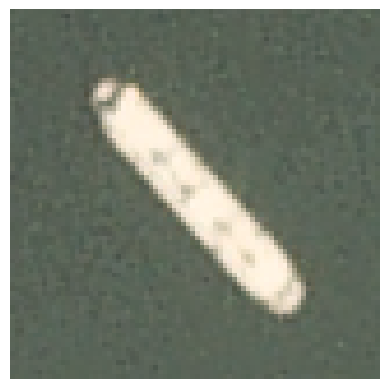

In [8]:
# Plot the image
plt.imshow(image_rgb)
plt.axis('off')  # Optional: Hide axes
plt.show()


In [9]:
image = X[0]


In [ ]:
R_data = image[0:(6400-1)]
G_data = image[6400:(2*6400-1)]
B_data = image[2*6400:]


# Convert the list to a NumPy array
image_array = np.array(image)

# Extract the R, G, and B channels
R_data = image_array[0:6400]
G_data = image_array[6400:2*6400]
B_data = image_array[2*6400:]

# Reshape each channel into an 80x80 array
R = R_data.reshape((80, 80))
G = G_data.reshape((80, 80))
B = B_data.reshape((80, 80))

# Stack the R, G, and B channels to form the image
image_rgb = np.stack((R, G, B), axis=-1)

# Plot the image
plt.imshow(image_rgb)
plt.axis('off')  # Optional: Hide axes
plt.show()


image = X[1]

R_data = image[0:(6400-1)]
G_data = image[6400:(2*6400-1)]
B_data = image[2*6400:]


# Convert the list to a NumPy array
image_array = np.array(image)

# Extract the R, G, and B channels
R_data = image_array[0:6400]
G_data = image_array[6400:2*6400]
B_data = image_array[2*6400:]

# Reshape each channel into an 80x80 array
R = R_data.reshape((80, 80))
G = G_data.reshape((80, 80))
B = B_data.reshape((80, 80))

# Stack the R, G, and B channels to form the image
image_rgb = np.stack((R, G, B), axis=-1)

# Plot the image
plt.imshow(image_rgb)
plt.axis('off')  # Optional: Hide axes
plt.show()



image = X[3200]

R_data = image[0:(6400-1)]
G_data = image[6400:(2*6400-1)]
B_data = image[2*6400:]


# Convert the list to a NumPy array
image_array = np.array(image)

# Extract the R, G, and B channels
R_data = image_array[0:6400]
G_data = image_array[6400:2*6400]
B_data = image_array[2*6400:]

# Reshape each channel into an 80x80 array
R = R_data.reshape((80, 80))
G = G_data.reshape((80, 80))
B = B_data.reshape((80, 80))

# Stack the R, G, and B channels to form the image
image_rgb = np.stack((R, G, B), axis=-1)

# Plot the image
plt.imshow(image_rgb)
plt.axis('off')  # Optional: Hide axes
plt.show()


In [13]:

# First we need to split the set into training and test

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,  # Adjust the test size as needed
                                                    random_state=42,  # For reproducibility
                                                    stratify=y
                                                    )# Ensures the proportion of classes is maintained
reshaped_images_train = []

for image in X_train:
    image_array = np.array(image)
    image_array = image_array/255
    # Extract the R, G, and B channels
    R_data = image_array[0:6400].reshape((80, 80))
    G_data = image_array[6400:2*6400].reshape((80, 80))
    B_data = image_array[2*6400:].reshape((80, 80))

    # Stack the R, G, and B channels to form the image
    image_rgb = np.stack((R_data, G_data, B_data), axis=-1)

    # Append the reshaped image to the list
    reshaped_images_train.append(image_rgb)


# Convert the list of reshaped images to a NumPy array
X_train_transformed = np.array(reshaped_images_train)


reshaped_images_test = []

for image in X_test:
    image_array = np.array(image)
    image_array = image_array/255
    # Extract the R, G, and B channels
    R_data = image_array[0:6400].reshape((80, 80))
    G_data = image_array[6400:2*6400].reshape((80, 80))
    B_data = image_array[2*6400:].reshape((80, 80))

    # Stack the R, G, and B channels to form the image
    image_rgb = np.stack((R_data, G_data, B_data), axis=-1)

    # Append the reshaped image to the list
    reshaped_images_test.append(image_rgb)


# Convert the list of reshaped images to a NumPy array
X_test_transformed = np.array(reshaped_images_test)







# Check the shape of the resulting tensor
print(X_train_transformed.shape)  # Should output (2800, 80, 80, 3)
print(X_test_transformed.shape)   # Should output (1200, 80, 80, 3)


(2800, 80, 80, 3)
(1200, 80, 80, 3)


In [14]:

def initialize_model():

    model = Sequential()


    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (4,4), input_shape=(80, 80, 3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(32, (4,4), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu'))

    ### Last layer - Classification Layer with 2 outputs
    model.add(layers.Dense(1, activation='sigmoid'))



    return model


In [ ]:

# Define the Neural Network

def initialize_model_2():

    model = Sequential()

    model.add(layers.RandomFlip("horizontal"))

    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3),activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(128, (3, 3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())



    model.add(layers.Flatten())

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(1, activation='sigmoid'))

    return model


In [15]:

# Initialize model

model = initialize_model()

from tensorflow.keras.metrics import Precision, Recall
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',Precision(),Recall()])

# Fit model

es = EarlyStopping(patience= 3,restore_best_weights=True)

history = model.fit(X_train_transformed, y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.2,
          callbacks=[es])
# Evaluate model

evaluation = model.evaluate(X_test_transformed, y_test)

print("Test Metrics: ", evaluation)


2024-09-09 17:02:14.579998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
70/70 [==============================] - 5s 42ms/step - loss: 0.4259 - accuracy: 0.8165 - precision: 0.7264 - recall: 0.4268 - val_loss: 0.3137 - val_accuracy: 0.8750 - val_precision: 0.7244 - val_recall: 0.8071
Epoch 2/10
70/70 [==============================] - 1s 21ms/step - loss: 0.2533 - accuracy: 0.8906 - precision: 0.7911 - recall: 0.7643 - val_loss: 0.2099 - val_accuracy: 0.9214 - val_precision: 0.8429 - val_recall: 0.8429
Epoch 3/10
70/70 [==============================] - 2s 23ms/step - loss: 0.2165 - accuracy: 0.9040 - precision: 0.8064 - recall: 0.8107 - val_loss: 0.2496 - val_accuracy: 0.8839 - val_precision: 0.9121 - val_recall: 0.5929
Epoch 4/10
70/70 [==============================] - 2s 22ms/step - loss: 0.1838 - accuracy: 0.9268 - precision: 0.8536 - recall: 0.8536 - val_loss: 0.1558 - val_accuracy: 0.9429 - val_precision: 0.8600 - val_recall: 0.9214
Epoch 5/10
70/70 [==============================] - 1s 21ms/step - loss: 0.1596 - accuracy: 0.9366 - precisi

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import time
# Define the image path
image_path = "/home/olivierpi/code/AlexRohn-96/shipvision_lewagon_backend/raw_data/scenes/scenes/lb_1.png"
# Load the image
image = Image.open(image_path)
img_array=np.array(image)
# Define parameters
patch_size = 80
stride = 20
# Create a copy of the cropped image for drawing the red boxes
output_image = image.copy()
draw = ImageDraw.Draw(output_image)
# Initialize variables
img_height, img_width = img_array.shape[:2]
patches = []
coordinates = []
# Extract patches and their coordinates
for y in range(0, img_height - patch_size + 1, stride):
    for x in range(0, img_width - patch_size + 1, stride):
        sub_image = img_array[y:y+patch_size, x:x+patch_size]
        patches.append(sub_image)
        coordinates.append((x, y))
# Convert patches to numpy array
patches_array = np.array(patches) / 255.0  # Normalize
# Preprocess patches for model input
preprocessed_patches = patches_array.reshape(-1, patch_size, patch_size, 3)
# Perform batch prediction
start_time = time.time()
predictions = model.predict(preprocessed_patches, verbose=0)
print(f"Prediction time: {time.time() - start_time:.2f} seconds")
# Draw rectangles for patches classified as containing a ship
for idx, prediction in enumerate(predictions):
    if prediction[0] > 0.7:
        x, y = coordinates[idx]
        draw.rectangle([x, y, x + patch_size, y + patch_size], outline="red", width=2)

# Display the output image with red boxes
plt.imshow(output_image)
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:
history.history.keys()


In [ ]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('recall')
    ax[1].plot(history.epoch, history.history["recall_10"], label="recall")
    ax[1].plot(history.epoch, history.history["val_recall_10"], label="Validation rec")
    ax[0].legend()
    ax[1].legend()


In [ ]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()


In [ ]:
plot_history(history)

y_pred= model.predict(X_test_transformed)
y_pred
y_test
predicted_probabilities= model.predict(X_test_transformed)  # Predicted classes (0 or 1)
predicted_class = (predicted_probabilities >= 0.5).astype(int)
# `y_test` is already in the format of class labels (0 or 1)
true_class = y_test  # Directly use `y_test`

# Check if y_test is a pandas DataFrame or Series, and convert if necessary
if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
    true_class = y_test.values.ravel()  # Convert to a flat array or list
else:
    true_class = y_test  # If it's already a list or NumPy array


In [ ]:

# Ensure predicted_class and true_class have the same length
print('Length of predicted_class:', len(predicted_class))
print('Length of true_class:', len(true_class))
correct = []
incorrect = []

# Loop through predictions and compare them to true labels
for i in range(len(predicted_class)):
    if predicted_class[i] == true_class[i]:
        correct.append(i)
    else:
        incorrect.append(i)

# Output the number of correct and incorrect predictions
print('Correct predictions: ', len(correct))
print('Incorrect predictions: ', len(incorrect))
print('ratio correct',len(correct)/1200 )
# Loading most recent model and evaluating it


In [ ]:

from tensorflow import keras

# Get the latest model version name by the timestamp on disk
local_model_directory = os.path.join(LOCAL_REGISTRY_PATH, "models")
local_model_paths = glob.glob(f"{local_model_directory}/*")

most_recent_model_path_on_disk = sorted(local_model_paths)[-1]

latest_model = keras.models.load_model(most_recent_model_path_on_disk)

evaluation = latest_model.evaluate(X_test_tensor, y_test_cat)

accuracy = evaluation[1]

accuracy

# Explainable AI 

In [17]:
!pip install shap

  Using cached shap-0.46.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.60.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.43.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
Using cached shap-0.46.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (540 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.60.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
Using cached llvmlite-0.43.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)


In [18]:
import shap
# Run the following command. Needed for some visualizations.
shap.initjs();

In [19]:
import requests

In [ ]:
# Function to preprocess the data and get the model output
def model(X):
    X_copy = X.copy()
    X_copy = preprocess_input(X_copy)
    return model_deep(X_copy)  # Your model returns probabilities for class 0 and 1

# A masker that will mask out partitions of the input image
masker = shap.maskers.Image("blur(80,80)", X[0].shape)

# Create the SHAP explainer for binary classification
explainer = shap.Explainer(model, masker, output_names=["Class 0", "Class 1"])

# Explain some images using 500 evaluations of the model
shap_values = explainer(X[1:5], max_evals=500, batch_size=50)

# Plot SHAP values for both classes (0 and 1)
shap.image_plot(shap_values[..., 0], X[1:5])  # SHAP values for class 0
shap.image_plot(shap_values[..., 1], X[1:5])  # SHAP values for class 1
